# Cryptocurrency quantitative analysis 

In [12]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

## XRP , BTC , ETH , DOGE

In [13]:
cryptocurrencies = ['XRP-USD','BTC-USD', 'ETH-USD', 'DOGE-USD']

In [14]:
data = yf.download(cryptocurrencies, start='2018-01-01',
                end='2022-08-30')
data.head(1)

[*********************100%***********************]  4 of 4 completed


Adj Close                                        Close  \
                 BTC-USD  DOGE-USD     ETH-USD  XRP-USD       BTC-USD   
Date                                                                    
2017-12-31  14156.400391  0.008972  756.732971  2.30057  14156.400391   

                                                   High            ...  \
            DOGE-USD     ETH-USD  XRP-USD       BTC-USD  DOGE-USD  ...   
Date                                                               ...   
2017-12-31  0.008972  756.732971  2.30057  14377.400391  0.009274  ...   

                   Low                  Open                                \
               ETH-USD XRP-USD       BTC-USD  DOGE-USD     ETH-USD XRP-USD   
Date                                                                         
2017-12-31  710.119019  1.8703  12897.700195  0.007803  712.211975  2.0951   

                 Volume                                    
                BTC-USD  DOGE-USD     ETH-USD     XRP-USD  
Date                                                       
2017-12-31  12136299520  62256400  2554269952  4642079744  

[1 rows x 24 columns]

In [15]:
adj_close=data['Adj Close']
adj_close.head()

,BTC-USD,DOGE-USD,ETH-USD,XRP-USD
Date,,,,
2017-12-31,14156.400391,0.008972,756.732971,2.30057
2018-01-01,13657.200195,0.008909,772.640991,2.39103
2018-01-02,14982.099609,0.009145,884.443970,2.48090
2018-01-03,15201.000000,0.009320,962.719971,3.10537
2018-01-04,15599.200195,0.009644,980.921997,3.19663


In [39]:
adj_close.describe()

,BTC-USD,DOGE-USD,ETH-USD,XRP-USD
count,1703.000000,1703.000000,1703.000000,1703.000000
mean,20467.379141,0.061322,1132.327059,0.532298
std,17576.930631,0.102582,1240.907690,0.371294
min,3236.761719,0.001537,84.308296,0.139635
25%,7459.607910,0.002582,202.178337,0.281396
50%,10363.138672,0.003513,444.163055,0.392309
75%,35697.951172,0.078803,1884.835815,0.707040
max,67566.828125,0.684777,4812.087402,3.377810


## Plotting closing prices

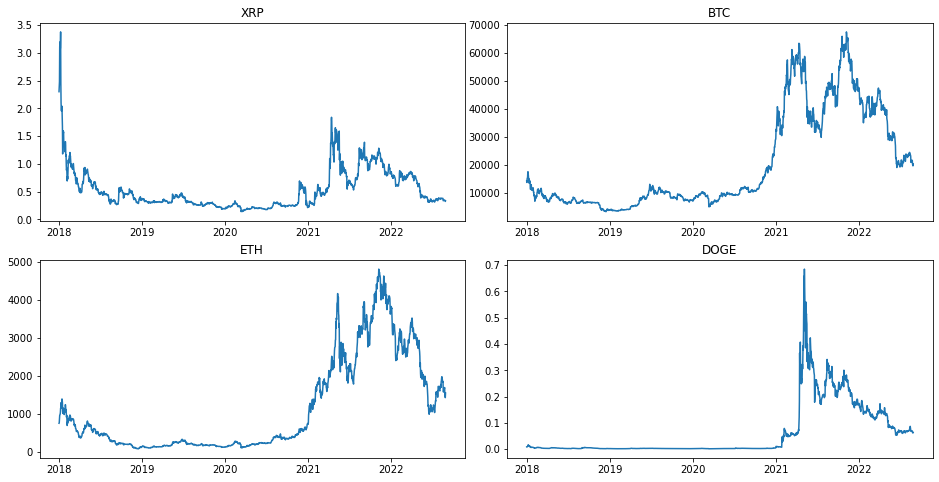

In [31]:
# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close['XRP-USD'])
axs[0,0].set_title('XRP')
axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(adj_close['DOGE-USD'])
axs[1,1].set_title('DOGE')
plt.show()

In [17]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,BTC-USD,DOGE-USD,ETH-USD,XRP-USD
Date,,,,
2018-01-01,-0.035263,-0.007022,0.021022,0.039321
2018-01-02,0.097011,0.026490,0.144702,0.037586
2018-01-03,0.014611,0.019136,0.088503,0.251711
2018-01-04,0.026196,0.034764,0.018907,0.029388
2018-01-05,0.117333,0.261613,0.017125,-0.046274


## Ploting the returns

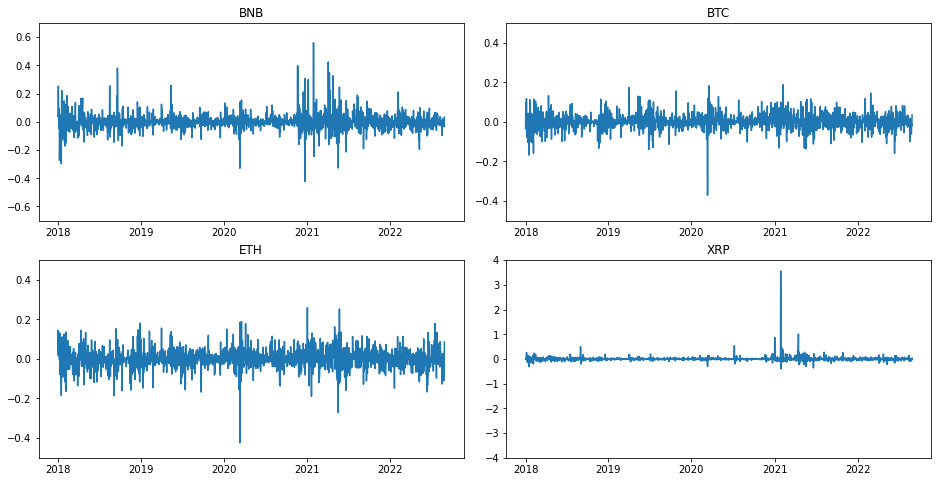

In [26]:

fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns['XRP-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.7,0.7])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['DOGE-USD'])
axs[1,1].set_title('XRP')
axs[1,1].set_ylim([-4,4])
plt.show()

In [27]:
#volatility, standard deviation of the returns
returns.std()

BTC-USD     0.039082
DOGE-USD    0.113393
ETH-USD     0.050634
XRP-USD     0.060966
dtype: float64

## Ploting the histogram

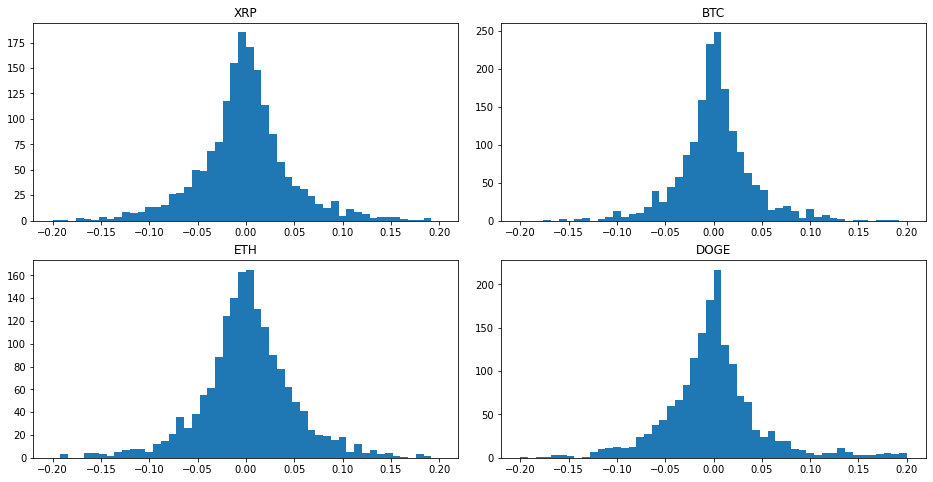

In [29]:

fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns['XRP-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('XRP')
axs[0,1].hist(returns['BTC-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('BTC')
axs[1,0].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('ETH')
axs[1,1].hist(returns['DOGE-USD'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('DOGE')
plt.show()

In [35]:
# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns

,BTC-USD,DOGE-USD,ETH-USD,XRP-USD
Date,,,,
2018-01-01,-3.526322,-0.702187,2.102197,3.932072
2018-01-02,5.832692,1.928218,16.876627,7.838494
2018-01-03,7.378992,3.878732,27.220566,34.982636
2018-01-04,10.191855,7.489963,29.625910,38.949477
2018-01-05,23.120988,35.610786,31.845712,32.519771
...,...,...,...,...
2022-08-25,52.587548,670.106996,124.181725,-84.808244
2022-08-26,43.115615,608.559905,99.248995,-85.291906
2022-08-27,41.573689,608.727152,97.083394,-85.423308


## Correlation graph

In [36]:
#compute the correlations
returns.corr()

,BTC-USD,DOGE-USD,ETH-USD,XRP-USD
BTC-USD,1.000000,0.353699,0.816024,0.604995
DOGE-USD,0.353699,1.000000,0.321813,0.274254
ETH-USD,0.816024,0.321813,1.000000,0.659744
XRP-USD,0.604995,0.274254,0.659744,1.000000


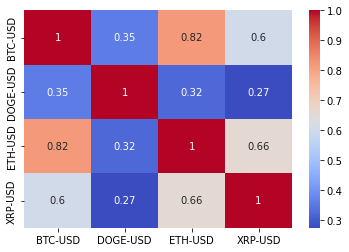

In [37]:
#plot the correlations
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

## Adding moving average for trend analysis

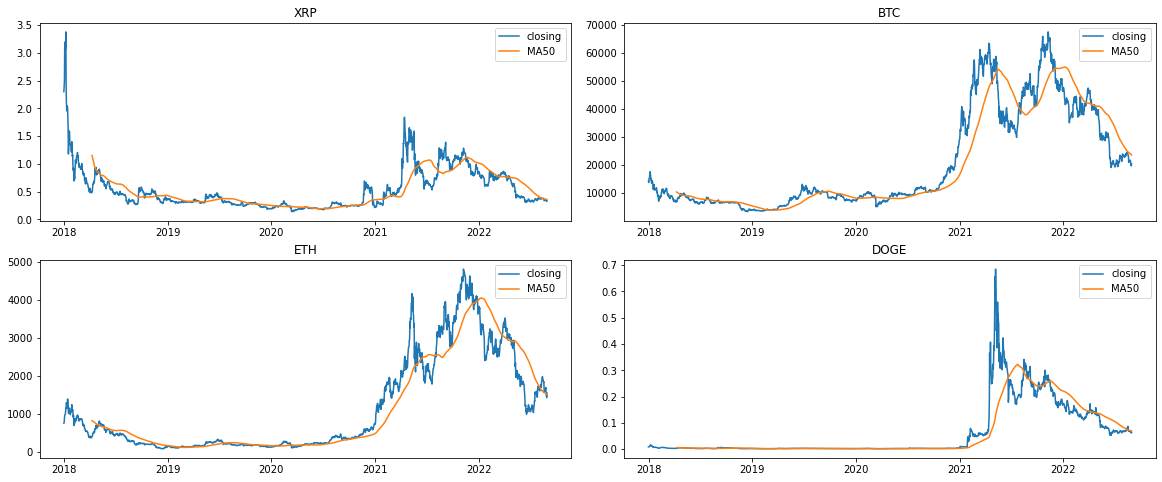

In [38]:
# compute a short-term 20-day moving average
MA20 = adj_close.rolling(20).mean()
# compute a Long-term 50-day moving average
MA50 = adj_close.rolling(100).mean()
# compute a Long-term 100-day moving average
MA100 = adj_close.rolling(100).mean()
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close['XRP-USD'], label= 'closing')
axs[0,0].plot(MA50['XRP-USD'], label= 'MA50')
axs[0,0].set_title('XRP')
axs[0,0].legend()
axs[0,1].plot(adj_close['BTC-USD'], label= 'closing')
axs[0,1].plot(MA50['BTC-USD'], label= 'MA50')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(adj_close['ETH-USD'], label= 'closing')
axs[1,0].plot(MA50['ETH-USD'], label= 'MA50')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(adj_close['DOGE-USD'], label= 'closing')
axs[1,1].plot(MA50['DOGE-USD'], label= 'MA50')
axs[1,1].set_title('DOGE')
axs[1,1].legend()
plt.show()

## Box plotting for visually analysing the risk by deviation of returns

             BTC-USD  DOGE-USD   ETH-USD   XRP-USD
Date                                              
2018-01-01 -0.035263 -0.007022  0.021022  0.039321
2018-01-02  0.097011  0.026490  0.144702  0.037586
2018-01-03  0.014611  0.019136  0.088503  0.251711
2018-01-04  0.026196  0.034764  0.018907  0.029388
2018-01-05  0.117333  0.261613  0.017125 -0.046274
...              ...       ...       ...       ...
2022-08-25  0.009623  0.016238  0.023776  0.009684
2022-08-26 -0.062075 -0.079920 -0.111217 -0.031837
2022-08-27 -0.010774  0.000236 -0.010869 -0.008934
2022-08-28 -0.021202 -0.028323 -0.040799 -0.036535
2022-08-29  0.034724  0.034004  0.085625  0.033123

[1702 rows x 4 columns]


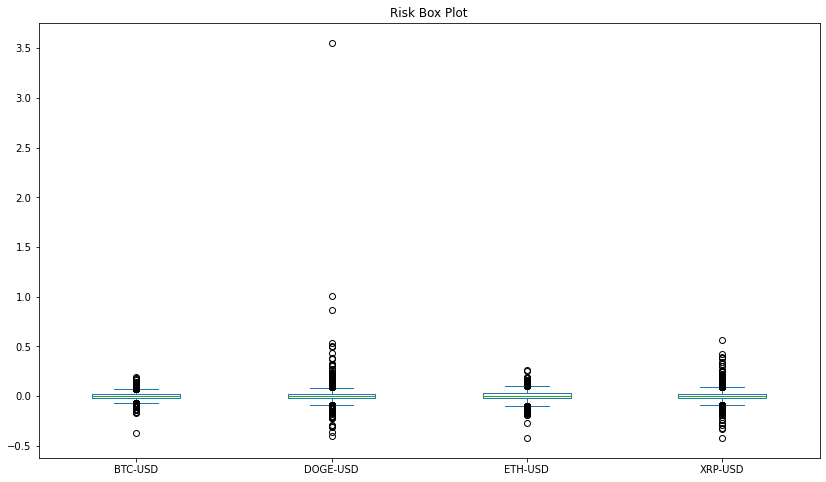

In [54]:
returns.plot(kind = "box",figsize = (14,8), title = "Risk Box Plot")

print(returns)